In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Data exploration
df = pd.read_csv('Housing 2.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Check for null values in the data 
df.isnull().values.any()

False

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64


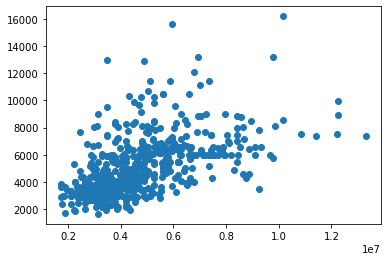

In [5]:
# visualize the data 
plt.scatter(df["price"], df["area"])
print(df.columns)
print(df["area"])

In [6]:
# the correlation here is clear between price and area 
from sklearn.model_selection import train_test_split
X = df[["price"]]
Y = df["area"]


In [7]:

# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
# fit the x and y we have to our ML model to predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [9]:
# fit the training data
print(X.shape)
print(Y.shape)

# convert to numeric types

(545, 1)
(545,)


In [10]:
# fit the data now 
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
# predict on our testing set 
lr.predict(x_test)

array([ 5920.15068921,  6268.63480367,  5048.94040307,  4308.41165985,
        5271.09902604,  4330.191917  ,  3829.24600247,  3981.70780255,
        4482.65371708,  3607.0873795 ,  4395.53268846,  5070.72066022,
        5702.34811768,  4264.85114554,  4635.11551715,  3633.22368809,
        4308.41165985,  4173.3740655 ,  5266.74297461,  3715.98866527,
        5876.59017491,  4569.77474569,  6355.75583228,  4957.46332302,
        4809.35757438,  3916.36703108,  4744.01680292,  5397.42451753,
        6002.9156664 , 10494.00469146,  4047.04857401,  4347.61612272,
        3633.22368809,  4831.13783153,  5920.15068921,  5484.54554614,
        5867.87807204,  5266.74297461,  5872.23412347,  7483.97315284,
        5419.20477468,  3894.58677393,  3785.68548816,  5920.15068921,
        4482.65371708,  5484.54554614,  4613.33526   ,  6595.33866097,
        4831.13783153,  5266.74297461,  5114.28117453,  4783.2212658 ,
        5005.37988876,  3393.6408594 ,  5048.94040307,  3524.32240232,
      

In [12]:
# test the accuracy of the model
lr.score(x_test, y_test)

0.24753664489845262

In [13]:
# Notice how this accuracy is very low, lets try some feature engineering with our other columns
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
df["price_per_sqft"]= df["price"]/ df["area"]
df["price_per_bathroom"] = df["price"] / df["bathrooms"]
df["price_per_bedroom"] = df["price"] / df["bedrooms"]
df["area_per_bedroom"] = df["area"] / df["bedrooms"]
df["stories_area_interaction"] = df["stories"] * df["area"]


df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,price_per_bathroom,price_per_bedroom,area_per_bedroom,stories_area_interaction
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830,6650000.0,3.325000e+06,1855.0,22260
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.187500,3062500.0,3.062500e+06,2240.0,35840
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679,6125000.0,4.083333e+06,3320.0,19920
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667,6107500.0,3.053750e+06,1875.0,15000
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849,11410000.0,2.852500e+06,1855.0,14840


In [15]:
# using one hot encoding lets turn the categorical values into numerical binary columns
df["mainroad_yes_True"] = df["mainroad_yes_True"].astype(int)

KeyError: 'mainroad_yes_True'

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,price_per_bedroom,mainroad_yes_True,area_per_bedroom,stories_area_interaction,bathroom,price_per_bathroom
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,1792.452830,3.325000e+06,1,1855.0,22260,6650000.0,6650000.0
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,1367.187500,3.062500e+06,1,2240.0,35840,3062500.0,3062500.0
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,1229.919679,4.083333e+06,1,3320.0,19920,6125000.0,6125000.0
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,1628.666667,3.053750e+06,1,1875.0,15000,6107500.0,6107500.0
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,1537.735849,2.852500e+06,1,1855.0,14840,11410000.0,11410000.0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price_per_sqft', 'price_per_bedroom',
       'mainroad_yes_True', 'area_per_bedroom', 'stories_area_interaction',
       'bathroom', 'price_per_bathroom'],
      dtype='object')

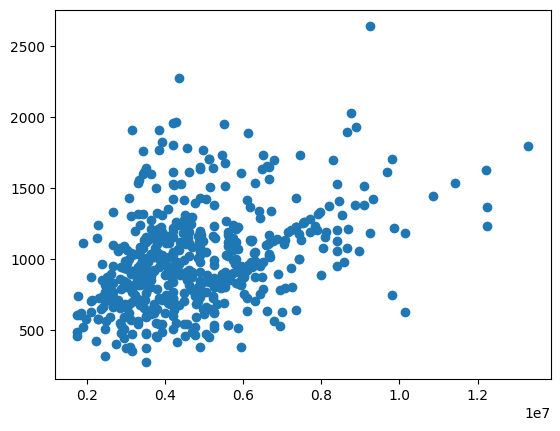

In [ ]:
plt.scatter(df["price"], df["price_per_sqft"])

In [ ]:
X = [["price"]]
Y = ["price_per_sqft"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

lr = LinearRegression() 
lr.fit(x_train, y_train)

In [16]:
lr.predict(x_test)

array([ 5920.15068921,  6268.63480367,  5048.94040307,  4308.41165985,
        5271.09902604,  4330.191917  ,  3829.24600247,  3981.70780255,
        4482.65371708,  3607.0873795 ,  4395.53268846,  5070.72066022,
        5702.34811768,  4264.85114554,  4635.11551715,  3633.22368809,
        4308.41165985,  4173.3740655 ,  5266.74297461,  3715.98866527,
        5876.59017491,  4569.77474569,  6355.75583228,  4957.46332302,
        4809.35757438,  3916.36703108,  4744.01680292,  5397.42451753,
        6002.9156664 , 10494.00469146,  4047.04857401,  4347.61612272,
        3633.22368809,  4831.13783153,  5920.15068921,  5484.54554614,
        5867.87807204,  5266.74297461,  5872.23412347,  7483.97315284,
        5419.20477468,  3894.58677393,  3785.68548816,  5920.15068921,
        4482.65371708,  5484.54554614,  4613.33526   ,  6595.33866097,
        4831.13783153,  5266.74297461,  5114.28117453,  4783.2212658 ,
        5005.37988876,  3393.6408594 ,  5048.94040307,  3524.32240232,
      

In [17]:
lr.score(x_test, y_test)

0.24753664489845262

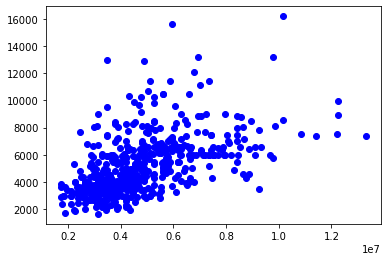

/Users/jimmychavada/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


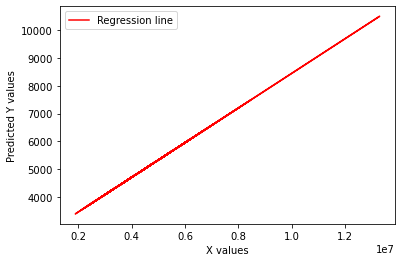

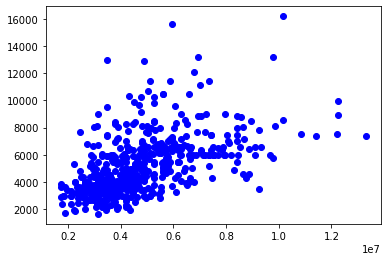

In [33]:

x_subset = x_test[:100]
y_pred = lr.predict(x_subset)
segment_size = 500  # Adjust the segment size as needed
segment_size = 500  # Adjust the segment size as needed
for i in range(0, len(x_test), segment_size):
    x_segment = x_test.iloc[i:i + segment_size].values  # Convert DataFrame to NumPy array
    y_pred_segment = lr.predict(x_segment.reshape(-1, 1))  # Reshape the data for prediction

    plt.plot(x_segment, y_pred_segment, color="red", label="Regression line" if i == 0 else "")

plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.legend()
plt.show()


